In [5]:
import pandas as pd
import requests


## Data preparation

### Listings

In [6]:
listings = pd.read_csv('../data - AirBnb/listings.csv')
listings = listings[["latitude", "longitude", "name", "room_type", "neighbourhood_group", "neighbourhood",
    "price", "minimum_nights", "number_of_reviews", "reviews_per_month",
    "availability_365"]]

In [7]:
# berlin_coords = [52.51687767752022, 13.389323026028334]

# m = leafmap.Map()
# m = leafmap.Map(center=berlin_coords, zoom = 11)
# m.add_geojson("../data - AirBnb/neighbourhoods.geojson", layer_name="Neighbourhoods")
# df2 = listings[:1000]
# for _, row in df2.iterrows():
#     m.add_marker([row['latitude'], row['longitude']], radius=1)
# m

### Points of interest

In [8]:
def fetch_data_from_link(link):
    try:
        response = requests.get(link)
        if response.status_code == 200:
            json_data = response.json()
            statistics = json_data.get('statistics', {})
            foursquare_stats = statistics.get('Foursquare', {})

            return (
                foursquare_stats.get('checkinsCount', None),
                foursquare_stats.get('usersCount', None),
                foursquare_stats.get('tipCount', None),
                foursquare_stats.get('likes', None),
                json_data.get('numReviews', None)
            )
        else:
            return (f"Error: {response.status_code}",) 
    except requests.exceptions.RequestException as e:
        return (f"Error: {e}",)

poi = pd.read_csv("../data - Tourpedia/berlin-poi.csv", index_col='id')
poi = poi[poi['type'] == 'poi']
poi = poi[1:5500]
poi = poi[["lat", "lng", "name", "category", "link1"]]
poi[['checkinsCount', 'usersCount', 'tipCount', 'likes', 'numReviews']] = poi['link1'].apply(fetch_data_from_link).apply(pd.Series)
poi = poi.drop(columns=['link1'])
poi = poi.fillna(0)
poi.head()


,lat,lng,name,category,checkinsCount,usersCount,tipCount,likes,numReviews
id,,,,,,,,,
92206,52.514967298868,13.38924407959,Friedrichstraße,Road,1632.0,811.0,5.0,6.0,5.0
92217,52.51717407176,13.396604061127,Kronprinzenpalais,Monument / Landmark,43.0,35.0,0.0,1.0,0.0
92219,52.534030062626,13.418166500438,Wasserturm,Monument / Landmark,576.0,297.0,5.0,13.0,5.0
92225,52.518487500219,13.395652887479,Palais am Festungsgraben,Monument / Landmark,217.0,124.0,1.0,0.0,1.0
92227,52.540293319482,13.212606513532,Zitadelle Spandau,Monument / Landmark,1568.0,1231.0,11.0,17.0,10.0


### Restaurants

In [9]:
rst = pd.read_csv("../data - Tourpedia/berlin-restaurant.csv", index_col='id')
rst = rst[rst['category'] == 'restaurant']
rst = rst[1:4500]
rst = rst[["lat", "lng", "name", "subCategory", "details"]]
rst[['checkinsCount', 'usersCount', 'tipCount', 'likes', 'numReviews']] = rst['details'].apply(fetch_data_from_link).apply(pd.Series)
rst = rst.drop(columns=['details'])
rst = rst.fillna(0)
rst.head()

,lat,lng,name,subCategory,checkinsCount,usersCount,tipCount,likes,numReviews
id,,,,,,,,,
91920,52.506011569827,13.32805032307,Hotel Savoy Berlin,Hotel,735.0,283.0,6.0,4.0,6.0
91947,52.511193329824,13.449347019196,Upstalsboom Hotel,Hotel,744.0,170.0,6.0,0.0,6.0
91956,52.500142117474,13.319578369231,Hotel Bleibtreu,Hotel,216.0,112.0,5.0,2.0,5.0
92003,52.502707245292,13.331705331802,Hotel Concorde Berlin,Hotel,2681.0,1155.0,30.0,95.0,30.0
92007,52.504889734436,13.385203007038,relexa hotel Stuttgarter Hof,Hotel,413.0,205.0,3.0,5.0,3.0


### Accomodation

In [10]:
acc = pd.read_csv("../data - Tourpedia/berlin-accommodation.csv", index_col='id')
acc = acc[acc['category'] == 'accommodation']
acc = acc[["lat", "lng", "name", "subCategory", "details"]]
acc[['checkinsCount', 'usersCount', 'tipCount', 'likes', 'numReviews']] = acc['details'].apply(fetch_data_from_link).apply(pd.Series)
acc = acc.drop(columns=['details'])
acc = acc.fillna(0)
acc.head()

,lat,lng,name,subCategory,checkinsCount,usersCount,tipCount,likes,numReviews
id,,,,,,,,,
91904,52.530068167132,13.388135746622,Hotel Zarenhof Berlin-Mitte,Hotel,141,69.0,1.0,0.0,1.0
91921,52.501832343626,13.347193587317,Best Western Hotel President Berlin,Hotel,531,291.0,10.0,1.0,10.0
91934,52.501500248909,13.277047276497,Motel Avus,Hotel,75.0,48.0,0.0,0.0,0.0
91940,52.507759698801,13.328216718728,Hotel Astoria,Hotel,181,41.0,1.0,2.0,1.0
91942,52.495192803401,13.310279846191,Hotel Wittelsbach,Hotel,113,57.0,2.0,1.0,2.0


### Attractions

In [11]:
att = pd.read_csv("../data - Tourpedia/berlin-attraction.csv", skiprows=3, names = ["address", "category","id", "lat", "lng",
                                                                                    "location", "name", "unq_id", "polarity",
                                                                                    "subCategory", "details", "reviews"])
att = att[(att['category'] == 'attraction') & (att['subCategory'] != 'Hotel')]
att = att[1:6500]
att = att[["lat", "lng", "name", "subCategory", "details"]]
att[['checkinsCount', 'usersCount', 'tipCount', 'likes', 'numReviews']] = att['details'].apply(fetch_data_from_link).apply(pd.Series)
att = att.drop(columns=['details'])
att = att.fillna(0)
att.head()

,lat,lng,name,subCategory,checkinsCount,usersCount,tipCount,likes,numReviews
1,52.508052842516,13.426333553402,Köpi,Rock Club,183.0,97.0,3.0,9.0,3.0
4,52.541703653439,13.421982957295,Cocktail Bar X,Cocktail Bar,211.0,139.0,3.0,4.0,3.0
5,52.487675,13.351513,Pinguin Club,Bar,41.0,33.0,1.0,2.0,1.0
6,52.504698864794,13.324902694366,Gainsbourg,Bar,361.0,203.0,8.0,6.0,8.0
7,52.486752629238,13.378601074219,Golgatha,Beer Garden,1022.0,718.0,14.0,18.0,14.0


### Public transport

In [12]:
stops = pd.read_csv("../GTFS/stops.txt")
stops = stops[['stop_name', 'stop_lat', 'stop_lon']]

### Aggregating

In [13]:
import geopandas as gpd
from shapely.geometry import Point

neighborhoods_gdf = gpd.read_file('../data - AirBnb/neighbourhoods.geojson')

listings_gdf = gpd.GeoDataFrame(
    listings, 
    geometry=gpd.points_from_xy(listings['longitude'], listings['latitude'])
)

poi_gdf = gpd.GeoDataFrame(
    poi, 
    geometry=gpd.points_from_xy(poi['lng'], poi['lat'])
)

att_gdf = gpd.GeoDataFrame(
    att, 
    geometry=gpd.points_from_xy(att['lng'], att['lat'])
)

stops_gdf = gpd.GeoDataFrame(
    stops, 
    geometry=gpd.points_from_xy(stops['stop_lon'], stops['stop_lat'])
)

merged_listings = gpd.sjoin(listings_gdf, neighborhoods_gdf, op='within')
merged_poi = gpd.sjoin(poi_gdf, neighborhoods_gdf, op='within')
merged_att = gpd.sjoin(att_gdf, neighborhoods_gdf, op='within')
merged_stops = gpd.sjoin(stops_gdf, neighborhoods_gdf, op='within')

agg_listings = merged_listings.groupby('neighbourhood_left').agg({
    'price': 'mean',
    'reviews_per_month': 'mean',  
})
agg_listings = agg_listings.reset_index()
agg_listings = agg_listings.rename(columns={'neighbourhood_left': 'neighbourhood'})

agg_att = merged_att.groupby('neighbourhood').agg({
    'checkinsCount': 'sum',
    'usersCount': 'sum',
    'tipCount': 'sum',
    'likes': 'sum',
    'numReviews': 'sum',
    'neighbourhood': 'size'  
}).rename(columns={'neighbourhood': 'numRestaurants',
                    'checkinsCount': 'checkinsCount_rest',
                    'usersCount': 'usersCount_rest',
                    'tipCount': 'tipCount_rest',
                    'likes': 'likes_rest',
                    'numReviews': 'numReviews_rest'})

merged_poi = merged_poi[~merged_poi['category'].isin(['Road', 'Subway', 'Light Rail', 'Train Station'])]
agg_poi = merged_poi.groupby('neighbourhood').agg({
    'checkinsCount': 'sum',
    'usersCount': 'sum',
    'tipCount': 'sum',
    'likes': 'sum',
    'numReviews': 'sum',
    'neighbourhood': 'size'  
}).rename(columns={'neighbourhood': 'numPOIs',
                    'checkinsCount': 'checkinsCount_poi',
                    'usersCount': 'usersCount_poi',
                    'tipCount': 'tipCount_poi',
                    'likes': 'likes_poi',
                    'numReviews': 'numReviews_poi'})

agg_stops = merged_stops.groupby('neighbourhood').size().reset_index(name='num_stops')

final_df = agg_listings.merge(agg_poi, how='inner', on='neighbourhood').merge(agg_att, how='inner', on='neighbourhood').merge(agg_stops, how='inner', on='neighbourhood')

/home/artur/Uni/2023W/188.995 Data Oriented Propgramming Paradigms/dopp-project/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/tmp/ipykernel_10627/774139664.py:26: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_listings = gpd.sjoin(listings_gdf, neighborhoods_gdf, op='within')
/home/artur/Uni/2023W/188.995 Data Oriented Propgramming Paradigms/dopp-project/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result

In [79]:
final_df = final_df.fillna(0)
final_df.head()

,neighbourhood,price,reviews_per_month,checkinsCount_poi,usersCount_poi,tipCount_poi,likes_poi,numReviews_poi,numPOIs,checkinsCount_rest,usersCount_rest,tipCount_rest,likes_rest,numReviews_rest,numRestaurants,num_stops,target_variable
0,Adlershof,110.270270,0.836667,674.0,173.0,1.0,0.0,1.0,28,1146.0,225.0,16.0,9.0,16.0,36,121,92.259459
1,Albrechtstr.,91.820000,1.280000,2229.0,202.0,1.0,0.0,1.0,39,4507.0,979.0,22.0,13.0,22.0,64,114,117.529600
2,Alexanderplatz,149.550069,1.658514,19378.0,7214.0,97.0,77.0,97.0,114,119212.0,60204.0,783.0,1136.0,793.0,94,821,248.030925
3,Allende-Viertel,44.500000,1.926667,13.0,7.0,0.0,0.0,0.0,4,474.0,116.0,1.0,2.0,1.0,10,15,85.736667
4,Alt Treptow,137.981481,0.689419,900.0,404.0,5.0,3.0,5.0,35,8614.0,5170.0,75.0,149.0,74.0,41,62,95.127000


## Is the position or the popularity of Airbnb apartments related to Points of Interest, public transport or other features of the city?

### Random forest features importance

In [80]:
from sklearn.ensemble import RandomForestRegressor

X = final_df.drop(['neighbourhood', 'reviews_per_month', 'price'], axis=1)
y = final_df['reviews_per_month']

rf = RandomForestRegressor()
rf.fit(X, y)

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
print(feature_importances.sort_values('Importance', ascending=False))


               Feature  Importance
13     target_variable    0.659696
9           likes_rest    0.093507
6   checkinsCount_rest    0.039174
0    checkinsCount_poi    0.037980
8        tipCount_rest    0.029253
10     numReviews_rest    0.023087
12           num_stops    0.021685
7      usersCount_rest    0.020272
11      numRestaurants    0.019631
5              numPOIs    0.018888
1       usersCount_poi    0.013374
3            likes_poi    0.009849
2         tipCount_poi    0.007656
4       numReviews_poi    0.005947


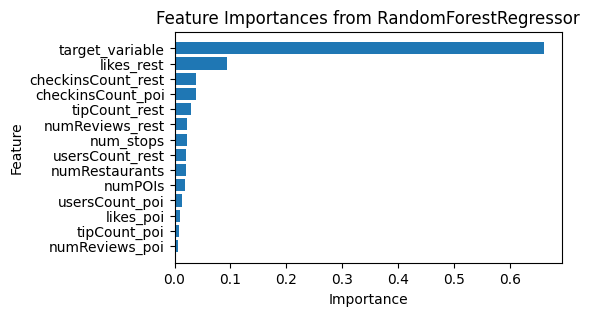

In [81]:
import matplotlib.pyplot as plt

# Assuming 'feature_importances' is the DataFrame containing feature importances
feature_importances_sorted = feature_importances.sort_values('Importance', ascending=True)

# Bar plot of feature importances
plt.figure(figsize=(5, 3))
plt.barh(feature_importances_sorted['Feature'], feature_importances_sorted['Importance'])
plt.title('Feature Importances from RandomForestRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### Linear model with recursive features elimination

In [82]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression  

X = final_df.drop(['neighbourhood', 'reviews_per_month', 'price'], axis=1)
y = final_df['reviews_per_month']

model = LinearRegression()

rfe = RFE(model, n_features_to_select=1)

fit = rfe.fit(X, y)

ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
print(ranking.sort_values('Ranking'))


               Feature  Ranking
2         tipCount_poi        1
4       numReviews_poi        2
8        tipCount_rest        3
10     numReviews_rest        4
13     target_variable        5
3            likes_poi        6
11      numRestaurants        7
5              numPOIs        8
12           num_stops        9
9           likes_rest       10
1       usersCount_poi       11
6   checkinsCount_rest       12
0    checkinsCount_poi       13
7      usersCount_rest       14


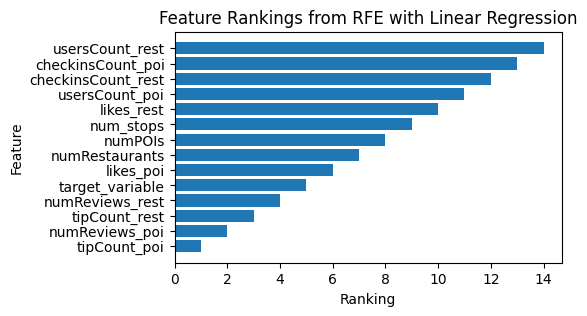

In [83]:
import matplotlib.pyplot as plt

# Assuming 'ranking' is the DataFrame containing feature rankings
ranking_sorted = ranking.sort_values('Ranking')

# Bar plot of feature rankings
plt.figure(figsize=(5, 3))
plt.barh(ranking_sorted['Feature'], ranking_sorted['Ranking'])
plt.title('Feature Rankings from RFE with Linear Regression')
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.show()


### Lasso Regression

In [84]:
from sklearn.linear_model import LassoCV

X = final_df.drop(['reviews_per_month', 'neighbourhood', 'price'], axis=1)
y = final_df['reviews_per_month']

lasso_model = LassoCV()
lasso_model.fit(X, y)

lasso_coefs = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
important_features_lasso = lasso_coefs[lasso_coefs['Coefficient'] != 0]

print(important_features_lasso)

               Feature   Coefficient
0    checkinsCount_poi -5.446991e-06
1       usersCount_poi  7.869191e-07
6   checkinsCount_rest  4.331491e-07
7      usersCount_rest  8.908815e-07
13     target_variable  3.452316e-03


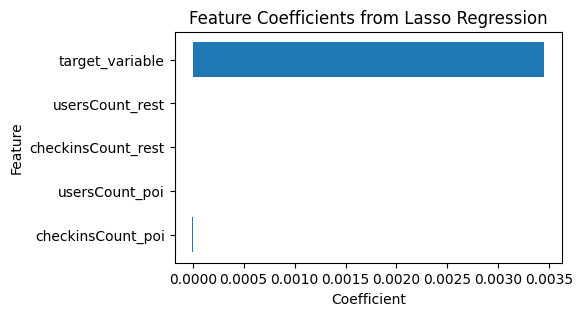

In [85]:
import matplotlib.pyplot as plt

important_features_lasso = lasso_coefs[lasso_coefs['Coefficient'] != 0]

plt.figure(figsize=(5, 3))
plt.barh(important_features_lasso['Feature'], important_features_lasso['Coefficient'])
plt.title('Feature Coefficients from Lasso Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


## How well can good locations for a new Airbnb be predicted?

In [86]:
from sklearn.model_selection import train_test_split

final_df['target_variable'] = final_df['reviews_per_month'] * final_df['price']

X = final_df.drop(['reviews_per_month', 'neighbourhood', 'price'], axis=1)
y = final_df['target_variable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12239164)


In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def plot_and_evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    k = X_test.shape[1]
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', linewidth=1, label='Equality Line')
    plt.title('Actual vs Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.show()

    print(f'Mean Absolute Error: {round(mae, 2)}')
    print(f'Mean Squared Error: {round(mse, 2)}')
    print(f'Root Mean Squared Error: {round(rmse, 2)}')
    print(f'R-squared: {round(r2, 2)}')
    print(f'Adjusted R-squared: {round(adj_r2, 2)}')

    return {'mae': round(mae, 2), 'mse': round(mse, 2), 'rmse': round(rmse, 2), 'r2': round(r2, 2), 'adj_r2': round(adj_r2, 2)}

/home/artur/Uni/2023W/188.995 Data Oriented Propgramming Paradigms/dopp-project/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


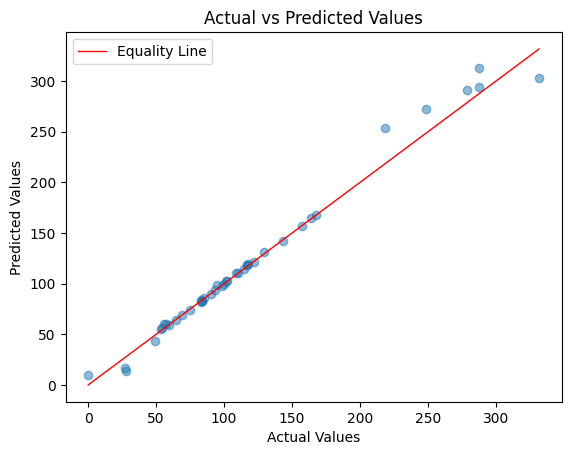

Mean Absolute Error: 4.94
Mean Squared Error: 96.3
Root Mean Squared Error: 9.81
R-squared: 0.98
Adjusted R-squared: 0.97


In [88]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

evaluation_metrics = plot_and_evaluate(rf, X_test, y_test)


/home/artur/Uni/2023W/188.995 Data Oriented Propgramming Paradigms/dopp-project/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


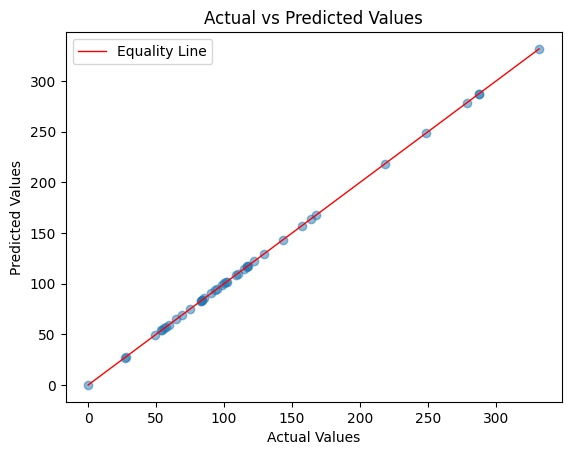

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R-squared: 1.0
Adjusted R-squared: 1.0


In [89]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

evaluation_metrics_linear = plot_and_evaluate(lm, X_test, y_test)

/home/artur/Uni/2023W/188.995 Data Oriented Propgramming Paradigms/dopp-project/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


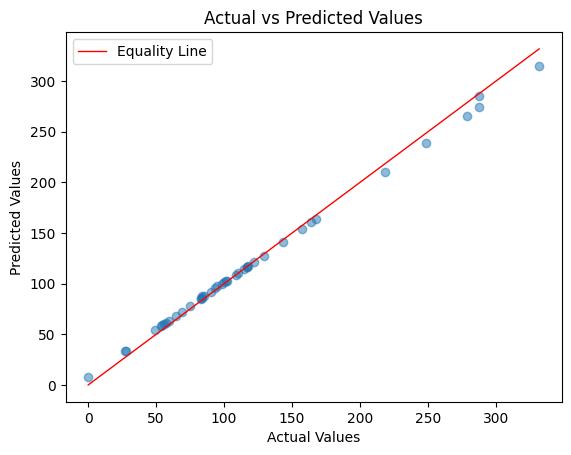

Mean Absolute Error: 3.75
Mean Squared Error: 27.46
Root Mean Squared Error: 5.24
R-squared: 1.0
Adjusted R-squared: 0.99


In [90]:
from sklearn.linear_model import LassoCV

# Assuming you've trained a Lasso Regression model named 'lasso_model'
lasso_model = LassoCV()
lasso_model.fit(X_train, y_train)

# Evaluate and plot using the Lasso model
evaluation_metrics_lasso = plot_and_evaluate(lasso_model, X_test, y_test)


/home/artur/Uni/2023W/188.995 Data Oriented Propgramming Paradigms/dopp-project/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


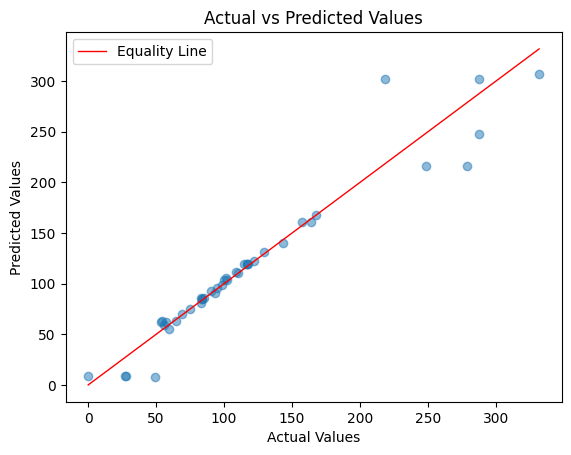

Mean Absolute Error: 10.17
Mean Squared Error: 408.0
Root Mean Squared Error: 20.2
R-squared: 0.93
Adjusted R-squared: 0.89


In [91]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

evaluation_metrics_linear = plot_and_evaluate(tree_model, X_test, y_test)


/home/artur/Uni/2023W/188.995 Data Oriented Propgramming Paradigms/dopp-project/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


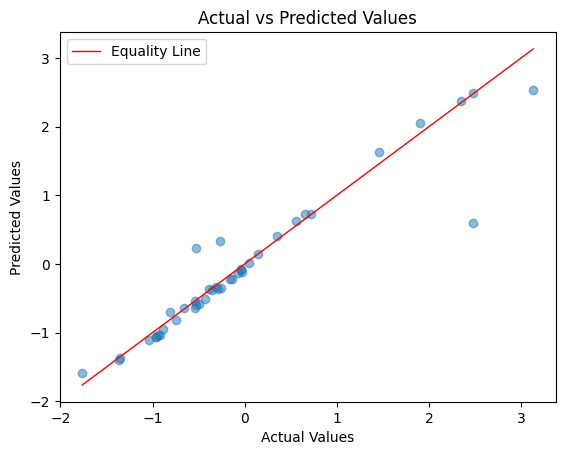

Mean Absolute Error: 0.15
Mean Squared Error: 0.12
Root Mean Squared Error: 0.35
R-squared: 0.9
Adjusted R-squared: 0.85


In [107]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Assuming you've trained an SVR model named 'svr_model'
svr_model = SVR()

# Convert Pandas Series to NumPy array and reshape for the target variable
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale target variable
y_train_scaled = scaler.fit_transform(y_train).ravel()  # Use .ravel() to convert back to 1D array
y_test_scaled = scaler.transform(y_test).ravel()

# Fit the SVR model
svr_model.fit(X_train_scaled, y_train_scaled)

# Evaluate and plot using the SVR model
evaluation_metrics_svr = plot_and_evaluate(svr_model, X_test_scaled, y_test_scaled)


/home/artur/Uni/2023W/188.995 Data Oriented Propgramming Paradigms/dopp-project/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


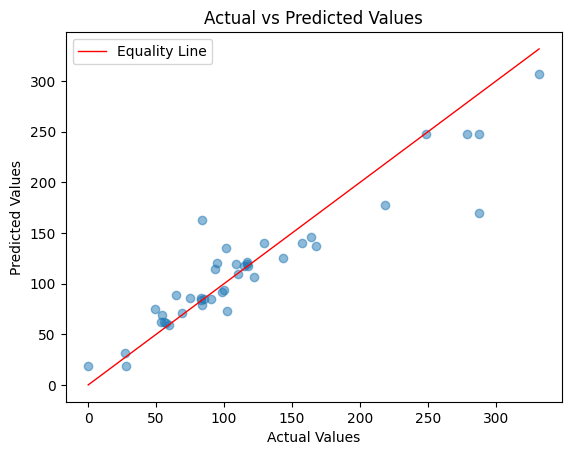

Mean Absolute Error: 17.35
Mean Squared Error: 777.36
Root Mean Squared Error: 27.88
R-squared: 0.86
Adjusted R-squared: 0.79


In [103]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)

evaluation_metrics_knn = plot_and_evaluate(knn_model, X_test_scaled, y_test)